# ROC曲线

绘制每个类别的ROC曲线，计算AUC值。

同济子豪兄：https://space.bilibili.com/1900783

## 设置Matplotlib中文字体

In [1]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [2]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [1]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib
matplotlib.rc("font",family='SimHei') # 中文字体

--2022-08-14 15:56:18--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
Connecting to 172.16.0.13:5848... connected.
Proxy request sent, awaiting response... 200 OK
Length: 10050868 (9.6M) [application/x-font-ttf]
Saving to: ‘/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’

/environment/minico 100%[===================>]   9.58M  17.2MB/s    in 0.6s    

2022-08-14 15:56:19 (17.2 MB/s) - ‘/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’ saved [10050868/10050868]



## 导入工具包

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## 载入类别名称和ID

In [3]:
idx_to_labels = np.load('idx_to_labels.npy', allow_pickle=True).item()
# 获得类别名称
classes = list(idx_to_labels.values())
print(classes)

['哈密瓜', '圣女果', '山竹', '杨梅', '柚子', '柠檬', '桂圆', '梨', '椰子', '榴莲', '火龙果', '猕猴桃', '石榴', '砂糖橘', '胡萝卜', '脐橙', '芒果', '苦瓜', '苹果-红', '苹果-青', '草莓', '荔枝', '菠萝', '葡萄-白', '葡萄-红', '西瓜', '西红柿', '车厘子', '香蕉', '黄瓜']


## 载入测试集预测结果表格

In [4]:
df = pd.read_csv('测试集预测结果.csv')

In [5]:
df.head()

,图像路径,标注类别ID,标注类别名称,top-1-预测ID,top-1-预测名称,top-2-预测ID,top-2-预测名称,top-3-预测ID,top-3-预测名称,top-n预测正确,...,草莓-预测置信度,荔枝-预测置信度,菠萝-预测置信度,葡萄-白-预测置信度,葡萄-红-预测置信度,西瓜-预测置信度,西红柿-预测置信度,车厘子-预测置信度,香蕉-预测置信度,黄瓜-预测置信度
0,fruit30_split/val/哈密瓜/106.jpg,0,哈密瓜,4.0,柚子,5.0,柠檬,7.0,梨,0.0,...,1.810175e-07,0.000001,0.000003,0.000010,0.000006,0.000111,1.294236e-04,3.994173e-07,0.000004,5.830796e-07
1,fruit30_split/val/哈密瓜/109.jpg,0,哈密瓜,6.0,桂圆,0.0,哈密瓜,8.0,椰子,1.0,...,8.460142e-08,0.000001,0.000001,0.001481,0.000045,0.000175,7.725556e-07,3.171619e-06,0.000033,2.559105e-06
2,fruit30_split/val/哈密瓜/114.jpg,0,哈密瓜,0.0,哈密瓜,26.0,西红柿,23.0,葡萄-白,1.0,...,9.829248e-03,0.007687,0.001150,0.040230,0.035187,0.001550,2.761092e-01,1.695518e-04,0.006084,1.219466e-03
3,fruit30_split/val/哈密瓜/116.jpg,0,哈密瓜,0.0,哈密瓜,16.0,芒果,4.0,柚子,1.0,...,4.417844e-05,0.000247,0.000071,0.001455,0.000003,0.000460,8.358340e-04,2.168997e-07,0.022086,4.123446e-04
4,fruit30_split/val/哈密瓜/118.png,0,哈密瓜,4.0,柚子,11.0,猕猴桃,23.0,葡萄-白,0.0,...,7.725807e-04,0.000075,0.000089,0.091698,0.000659,0.000463,3.796561e-03,3.087181e-08,0.000306,5.176165e-04


## 绘制某一类别的ROC曲线

In [7]:
specific_class = '荔枝'

In [8]:
# 二分类标注
y_test = (df['标注类别名称'] == specific_class)

In [9]:
y_test

0       False
1       False
2       False
3       False
4       False
        ...  
1073    False
1074    False
1075    False
1076    False
1077    False
Name: 标注类别名称, Length: 1078, dtype: bool

In [11]:
# 二分类置信度
y_score = df['荔枝-预测置信度']

In [12]:
y_score

0       1.220430e-06
1       1.464785e-06
2       7.686864e-03
3       2.469890e-04
4       7.507991e-05
            ...     
1073    2.404223e-10
1074    3.520831e-09
1075    5.867719e-04
1076    1.798972e-06
1077    5.098998e-08
Name: 荔枝-预测置信度, Length: 1078, dtype: float64

In [13]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, y_score)

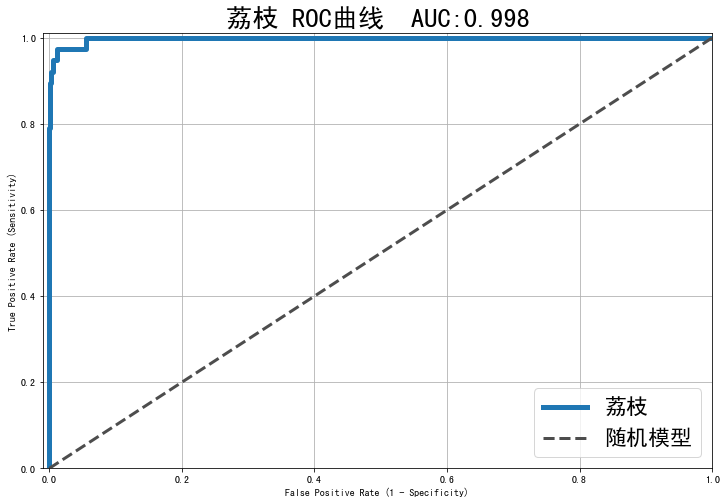

In [14]:
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, linewidth=5, label=specific_class)
plt.plot([0, 1], [0, 1],ls="--", c='.3', linewidth=3, label='随机模型')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.rcParams['font.size'] = 22
plt.title('{} ROC曲线  AUC:{:.3f}'.format(specific_class, auc(fpr, tpr)))
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
auc(fpr, tpr)

0.9979504048582996

## 绘制所有类别的ROC曲线

In [16]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'dimgray', 'dimgrey', 'gray', 'rosybrown', 'lightcoral', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'salmon', 'tomato', 'darksalmon', 'coral', 'orangered', 'lightsalmon', 'sienna', 'chocolate', 'saddlebrown', 'sandybrown', 'peachpuff', 'peru', 'darkorange', 'burlywood', 'tan', 'orange', 'wheat', 'darkgoldenrod', 'goldenrod', 'gold', 'khaki', 'palegoldenrod', 'darkkhaki', 'olive', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'greenyellow', 'chartreuse', 'lawngreen', 'darkseagreen', 'palegreen', 'lightgreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'springgreen', 'mediumspringgreen', 'mediumaquamarine', 'aquamarine', 'turquoise', 'lightseagreen', 'mediumturquoise', 'paleturquoise', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'aqua', 'cyan', 'darkturquoise', 'cadetblue', 'powderblue', 'lightblue', 'deepskyblue', 'skyblue', 'lightskyblue', 'steelblue', 'dodgerblue', 'lightslategray', 'lightslategrey', 'slategray', 'slategrey', 'lightsteelblue', 'cornflowerblue', 'royalblue', 'midnightblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'thistle', 'plum', 'violet', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink', 'lavenderblush', 'palevioletred', 'crimson', 'pink', 'lightpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

In [26]:
def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

In [27]:
get_line_arg()

{'color': 'lightblue', 'linestyle': '-.', 'linewidth': 2}

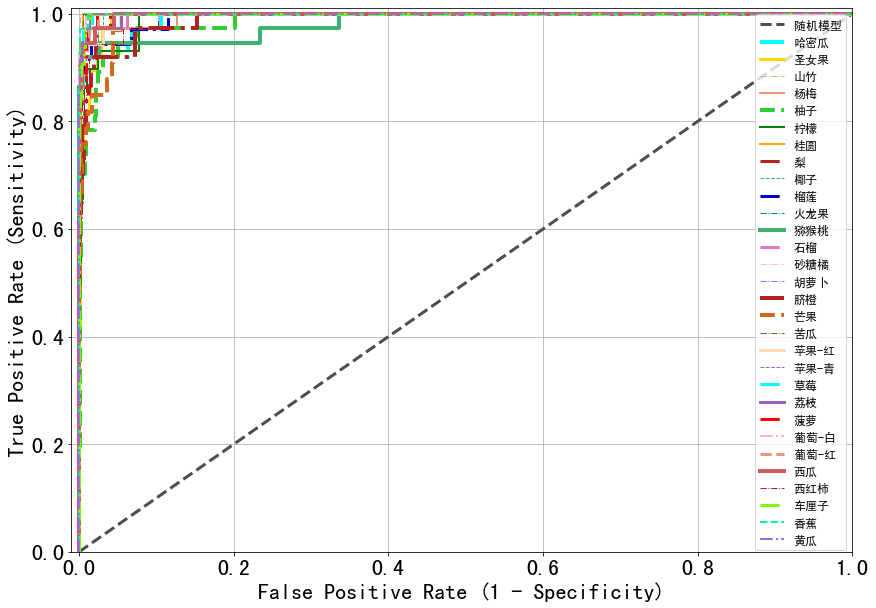

In [28]:
plt.figure(figsize=(14, 10))
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.plot([0, 1], [0, 1],ls="--", c='.3', linewidth=3, label='随机模型')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.rcParams['font.size'] = 22
plt.grid(True)

auc_list = []
for each_class in classes:
    y_test = list((df['标注类别名称'] == each_class))
    y_score = list(df['{}-预测置信度'.format(each_class)])
    fpr, tpr, threshold = roc_curve(y_test, y_score)
    plt.plot(fpr, tpr, **get_line_arg(), label=each_class)
    plt.legend()
    auc_list.append(auc(fpr, tpr))

plt.legend(loc='best', fontsize=12)
plt.show()

## 将AUC增加至`各类别准确率评估指标`表格中

In [29]:
df_report = pd.read_csv('各类别准确率评估指标.csv')

In [30]:
df_report

,类别,precision,recall,f1-score,support
0,哈密瓜,0.906250,0.783784,0.840580,37.0
1,圣女果,0.928571,0.684211,0.787879,38.0
2,山竹,1.000000,0.828571,0.906250,35.0
3,杨梅,0.864865,0.864865,0.864865,37.0
4,柚子,0.756757,0.756757,0.756757,37.0
5,柠檬,0.774194,0.827586,0.800000,29.0
6,桂圆,0.760000,1.000000,0.863636,38.0
7,梨,0.852941,0.783784,0.816901,37.0
8,椰子,0.944444,0.894737,0.918919,38.0
9,榴莲,0.935484,0.805556,0.865672,36.0


In [31]:
# 计算 AUC值 的 宏平均 和 加权平均
macro_avg_auc = np.mean(auc_list)
weighted_avg_auc = sum(auc_list * df_report.iloc[:-2]['support'] / len(df))

In [32]:
auc_list.append(macro_avg_auc)
auc_list.append(weighted_avg_auc)

In [33]:
df_report['AUC'] = auc_list

In [34]:
df_report

,类别,precision,recall,f1-score,support,AUC
0,哈密瓜,0.906250,0.783784,0.840580,37.0,0.992705
1,圣女果,0.928571,0.684211,0.787879,38.0,0.994686
2,山竹,1.000000,0.828571,0.906250,35.0,0.999918
3,杨梅,0.864865,0.864865,0.864865,37.0,0.995924
4,柚子,0.756757,0.756757,0.756757,37.0,0.986292
5,柠檬,0.774194,0.827586,0.800000,29.0,0.991355
6,桂圆,0.760000,1.000000,0.863636,38.0,0.999696
7,梨,0.852941,0.783784,0.816901,37.0,0.996287
8,椰子,0.944444,0.894737,0.918919,38.0,0.997596
9,榴莲,0.935484,0.805556,0.865672,36.0,0.994055


In [35]:
df_report.to_csv('各类别准确率评估指标.csv', index=False)